In [1]:
import numpy as np
import warnings
from utils import *
from calibrators import * 
import pickle
warnings.filterwarnings("ignore")
import torch
import sys
sys.path.append('../')
import time
import copy
from SLURM.sklearn_config import *
from ModelInfo import *
import tensorflow as tf

- PCA V
- Random choice of pixels
- random choice of images 
- K-means on images (according to classes?) V
- resizing layers V


# Resize

In [4]:
resized = keras.layers.Resizing(10,10, interpolation="bilinear")
#String, the interpolation method. Defaults to "bilinear".
#Supports "bilinear", "nearest", "bicubic", "area", "lanczos3", "lanczos5", "gaussian", "mitchellcubic".

In [41]:
model_info= load_model('SignLanguage', 'RF', 0)
model_info.data.X_train.shape

(20775, 784)

In [21]:
pixels=int(sqrt(model_info.data.X_train.shape[1]))
X_train=torch.tensor(model_info.data.X_train.reshape((pixels,pixels,len(model_info.data.X_train))))
model_info.data.X_train = tf.image.resize(X_train, [size,size]).numpy().reshape(len(model_info.data.X_train),-1)
X_test=torch.tensor(model_info.data.X_test.reshape((pixels,pixels,len(model_info.data.X_test))))
model_info.data.X_test = tf.image.resize(X_test, [size,size]).numpy().reshape(len(model_info.data.X_test),-1)
X_val=torch.tensor(model_info.data.X_val.reshape((pixels,pixels,len(model_info.data.X_val))))
model_info.data.X_val = tf.image.resize(X_val, [size,size]).numpy().reshape(len(model_info.data.X_val),-1)

In [44]:
length= len(model_info.data.X_train)
X_train=torch.tensor(model_info.data.X_train.reshape(length,pixels,pixels))
X_train = X_train[ ..., tf.newaxis]
model_info.data.X_train=tf.image.resize(X_train, [size,size]).numpy().reshape(length,-1)

torch.Size([20775, 28, 28, 1])


(196,)

In [46]:
#avg(2)
method_name='Resize'
red_param=2
all_time=[]
for dataset_name in ['Fashion']:#'MNIST','SignLanguage',
    for model_name in ['RF','GB','pytorch']:
        for shuffle in range(1):
            if model_name=='pytorch':
                model_info=load_model_pytorch(dataset_name, model_name, shuffle)
            else:
                model_info= load_model(dataset_name, model_name, shuffle)
            data=model_info.data
            pixels=int(sqrt(data.X_train.shape[1]))
            size=pixels//red_param
            
            length= len(model_info.data.X_train)
            X_train=torch.tensor(model_info.data.X_train.reshape(length,pixels,pixels))
            X_train = X_train[ ..., tf.newaxis]
            model_info.data.X_train=tf.image.resize(X_train, [size,size]).numpy().reshape(length,-1)
            
            length= len(model_info.data.X_test)
            X_test=torch.tensor(model_info.data.X_test.reshape(length,pixels,pixels))
            X_test = X_test[ ..., tf.newaxis]
            model_info.data.X_test=tf.image.resize(X_test, [size,size]).numpy().reshape(length,-1)
            
            length= len(model_info.data.X_val)
            X_val=torch.tensor(model_info.data.X_val.reshape(length,pixels,pixels))
            X_val = X_val[ ..., tf.newaxis]
            model_info.data.X_val=tf.image.resize(X_val, [size,size]).numpy().reshape(length,-1)
            
            print("done")
            print(model_info.data.X_train.shape,model_info.data.X_val.shape,model_info.data.X_test.shape)
            num_label=model_info.data.num_labels
            stability,time_all,ex_in_time=new_stability_calc(np.array(model_info.data.X_train),np.array(model_info.data.X_val),model_info.data.y_train,model_info.y_pred_val,num_label)
            print("train")
            stability_test,_,_=new_stability_calc(np.array(model_info.data.X_train),np.array(model_info.data.X_test),model_info.data.y_train,model_info.y_pred_test,num_label)

            all_time.append((model_name,time_all,ex_in_time))
            np.save(f'./stab/{dataset_name}/stab_{method_name}_{dataset_name}_{model_name}_{shuffle}.npy',stability)
            np.save(f'./stab/{dataset_name}/test_stab_{method_name}_{dataset_name}_{model_name}_{shuffle}.npy',stability_test)

all_time

done
(42000, 196) (14000, 196) (14000, 196)
train
done
(42000, 196) (14000, 196) (14000, 196)


KeyboardInterrupt: 

(array([2.000e+00, 1.100e+01, 1.700e+02, 3.530e+03, 6.046e+03, 2.437e+03,
        1.167e+03, 5.150e+02, 1.140e+02, 8.000e+00]),
 array([-221.90065002, -162.35749969, -102.81434937,  -43.27119904,
          16.27195129,   75.81510162,  135.35825195,  194.90140228,
         254.44455261,  313.98770294,  373.53085327]),
 <BarContainer object of 10 artists>)

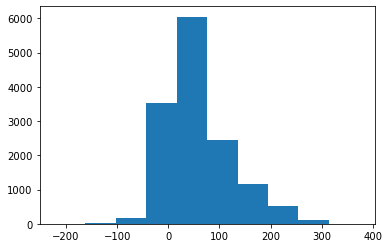

In [48]:
X=np.load(f'./stab/{dataset_name}/stab_{method_name}_{dataset_name}_RF_{shuffle}.npy')
plt.hist(X)

In [ ]:
#resize(2-4)
method_name='Resize'
all_time=[]
for red_param in [2,3,4]:
    for dataset_name in ['Fashion','MNIST','SignLanguage']:
        for model_name in ['RF','GB','pytorch']:
            for shuffle in range(10):
                if model_name=='pytorch':
                    model_info=load_model_pytorch(dataset_name, model_name, shuffle)
                else:
                    model_info= load_model(dataset_name, model_name, shuffle)
                data=model_info.data
                pixels=int(sqrt(data.X_train.shape[1]))
                size=pixels//red_param

                length= len(model_info.data.X_train)
                X_train=torch.tensor(model_info.data.X_train.reshape(length,pixels,pixels))
                X_train = X_train[ ..., tf.newaxis]
                model_info.data.X_train=tf.image.resize(X_train, [size,size]).numpy().reshape(length,-1)

                length= len(model_info.data.X_test)
                X_test=torch.tensor(model_info.data.X_test.reshape(length,pixels,pixels))
                X_test = X_test[ ..., tf.newaxis]
                model_info.data.X_test=tf.image.resize(X_test, [size,size]).numpy().reshape(length,-1)

                length= len(model_info.data.X_val)
                X_val=torch.tensor(model_info.data.X_val.reshape(length,pixels,pixels))
                X_val = X_val[ ..., tf.newaxis]
                model_info.data.X_val=tf.image.resize(X_val, [size,size]).numpy().reshape(length,-1)
            
                num_label=model_info.data.num_labels
                stability,time_all,ex_in_time=new_stability_calc(np.array(model_info.data.X_train),np.array(model_info.data.X_val),model_info.data.y_train,model_info.y_pred_val,num_label)
                stability_test,_,_=new_stability_calc(np.array(model_info.data.X_train),np.array(model_info.data.X_test),model_info.data.y_train,model_info.y_pred_test,num_label)

                all_time.append((model_name,time_all,ex_in_time))
                np.save(f'./stab/{dataset_name}/stab_{method_name}_{red_param}_{dataset_name}_{model_name}_{shuffle}.npy',stability)
                np.save(f'./stab/{dataset_name}/test_stab_{method_name}_{red_param}_{dataset_name}_{model_name}_{shuffle}.npy',stability_test)

all_time

# PCA

In [52]:
from sklearn.decomposition import PCA

In [54]:
#PCA(2-4)
method_name='PCA'
all_time=[]
for red_param in [2,3,4]:
    for dataset_name in ['Fashion','MNIST','SignLanguage']:
        for model_name in ['RF','GB','pytorch']:
            for shuffle in range(10):
                if model_name=='pytorch':
                    model_info=load_model_pytorch(dataset_name, model_name, shuffle)
                else:
                    model_info= load_model(dataset_name, model_name, shuffle)
                data=model_info.data
                pixels=int(sqrt(data.X_train.shape[1]))
                size=pixels//red_param
                pca = PCA(n_components=size**2)
                
                model_info.data.X_train=pca.fit_transform(model_info.data.X_train)

                model_info.data.X_test=pca.transform(model_info.data.X_test)
              
                model_info.data.X_val=pca.transform(model_info.data.X_val)
            
            
                print(model_info.data.X_train.shape,model_info.data.X_val.shape,model_info.data.X_test.shape)

                num_label=model_info.data.num_labels
                stability,time_all,ex_in_time=new_stability_calc(np.array(model_info.data.X_train),np.array(model_info.data.X_val),model_info.data.y_train,model_info.y_pred_val,num_label)
                stability_test,_,_=new_stability_calc(np.array(model_info.data.X_train),np.array(model_info.data.X_test),model_info.data.y_train,model_info.y_pred_test,num_label)

                all_time.append((model_name,time_all,ex_in_time))
                np.save(f'./stab/{dataset_name}/stab_{method_name}_{red_param}_{dataset_name}_{model_name}_{shuffle}.npy',stability)
                np.save(f'./stab/{dataset_name}/test_stab_{method_name}_{red_param}_{dataset_name}_{model_name}_{shuffle}.npy',stability_test)

all_time

(42000, 196) (14000, 196) (14000, 196)


KeyboardInterrupt: 

# Random choice of pixels

In [ ]:
np.random.randint(0,255, size=pixels//red_param)

In [55]:
np.random.randint(0,255, size=196)

array([193,  14, 107, 138,  35,  35, 225, 160, 146, 155,  63,  42,  95,
       166, 129,  83,  48, 198, 234,  27,   9, 138, 194,  52,  23,  98,
       186, 201, 148,  97, 222, 118,  18, 241, 175,  29, 137,   6, 154,
       167, 229,  78, 206, 125, 137,  68,  41, 224,  44, 163, 129, 215,
       215, 184,  59, 246, 128,  93, 207, 168, 111, 183,  19, 146, 238,
        57, 106,  38,  92,  93, 110, 167,  12,  82, 169,  13,  29,  27,
        97,  95, 190, 187, 135, 156,  13, 103, 228,  11,  30,  25,   5,
        98, 163, 200,  80,  50, 189,  76, 247, 219, 119,   8, 159,  67,
         7, 209,  78,  14, 222,   2, 210,  85, 249,  18, 224,  29,  64,
       254,  26, 105,  70,  86, 160, 101, 102, 208,  93, 188, 197,  76,
        59, 182,  44,  28, 253,  18,  45,   5, 199, 173,  22, 147,  30,
         2,  54,  52,  43, 155, 127,  23,  48, 168, 106, 168,  20, 214,
       122, 180, 196,  65, 203, 183,  30, 213,  46,  51,  41, 248, 214,
       197,   7,   8, 200,  51, 213, 179, 155,  46, 118,  26,  4

In [58]:
#random_pixels(2-4)
method_name='rand_pix'
all_time=[]
for red_param in [2,3,4]:
    for dataset_name in ['Fashion','MNIST','SignLanguage']:
        for model_name in ['RF','GB','pytorch']:
            for shuffle in range(10):
                if model_name=='pytorch':
                    model_info=load_model_pytorch(dataset_name, model_name, shuffle)
                else:
                    model_info= load_model(dataset_name, model_name, shuffle)
                data=model_info.data
                pixels=int(sqrt(data.X_train.shape[1]))
                size=(pixels//red_param)**2
                string=np.random.randint(0,255, size=size)
                
                model_info.data.X_train=model_info.data.X_train[:,string]

                model_info.data.X_test=model_info.data.X_test[:,string]
              
                model_info.data.X_val=model_info.data.X_val[:,string]
            
            
                print(model_info.data.X_train.shape,model_info.data.X_val.shape,model_info.data.X_test.shape)

                num_label=model_info.data.num_labels
                stability,time_all,ex_in_time=new_stability_calc(np.array(model_info.data.X_train),np.array(model_info.data.X_val),model_info.data.y_train,model_info.y_pred_val,num_label)
                stability_test,_,_=new_stability_calc(np.array(model_info.data.X_train),np.array(model_info.data.X_test),model_info.data.y_train,model_info.y_pred_test,num_label)

                all_time.append((model_name,time_all,ex_in_time))
                np.save(f'./stab/{dataset_name}/stab_{method_name}_{red_param}_{dataset_name}_{model_name}_{shuffle}.npy',stability)
                np.save(f'./stab/{dataset_name}/test_stab_{method_name}_{red_param}_{dataset_name}_{model_name}_{shuffle}.npy',stability_test)

all_time

(42000, 196) (14000, 196) (14000, 196)


KeyboardInterrupt: 

In [60]:
model_info.data.X_train.shape

(42000, 196)

# random subset

In [82]:
#random_subset(2-4)
method_name='rand_set'
all_time=[]
for red_param in [2,3,4]:
    for dataset_name in ['Fashion','MNIST','SignLanguage']:
        for model_name in ['RF','GB','pytorch']:
            for shuffle in range(10):
                if model_name=='pytorch':
                    model_info=load_model_pytorch(dataset_name, model_name, shuffle)
                else:
                    model_info= load_model(dataset_name, model_name, shuffle)
                data=model_info.data
                length=model_info.data.X_train.shape[0]
                size=(length//red_param)
                string=np.random.randint(0,length, size=size)
                
                model_info.data.X_train=model_info.data.X_train[string,:]
                model_info.data.y_train=model_info.data.y_train[string]
                print(model_info.data.X_train.shape,model_info.data.X_val.shape,model_info.data.X_test.shape)

                num_label=model_info.data.num_labels
                stability,time_all,ex_in_time=new_stability_calc(np.array(model_info.data.X_train),np.array(model_info.data.X_val),model_info.data.y_train,model_info.y_pred_val,num_label)
                stability_test,_,_=new_stability_calc(np.array(model_info.data.X_train),np.array(model_info.data.X_test),model_info.data.y_train,model_info.y_pred_test,num_label)

                all_time.append((model_name,time_all,ex_in_time))
                np.save(f'./stab/{dataset_name}/stab_{method_name}_{red_param}_{dataset_name}_{model_name}_{shuffle}.npy',stability)
                np.save(f'./stab/{dataset_name}/test_stab_{method_name}_{red_param}_{dataset_name}_{model_name}_{shuffle}.npy',stability_test)

all_time

(21000, 784) (14000, 784) (14000, 784)


KeyboardInterrupt: 

# K-means

In [61]:
from sklearn.cluster import KMeans


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [124]:
%%time
model_info= load_model('Fashion', 'RF', 0)
red_param=5
num_label=model_info.data.num_labels
new_points=[]
new_y=[]
for i in range(num_label):
    idx_same=np.where(model_info.data.y_train==i)    
    size=len(idx_same[0])//red_param**2
    kmeans = KMeans(n_clusters=size)
    kmeans.fit(model_info.data.X_train[idx_same])
    new_points.append(kmeans.cluster_centers_)
    new_y.append([i]*size)
    print(i)
new_points

0
1
2
3
4
5
6
7
8
9
CPU times: user 5min 5s, sys: 5.03 s, total: 5min 10s
Wall time: 1min 13s


[array([[4.33680869e-19, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 1.38777878e-17],
        [4.33680869e-19, 0.00000000e+00, 3.70370370e-02, ...,
         5.55111512e-17, 0.00000000e+00, 1.38777878e-17],
        [2.16840434e-19, 1.88679245e-02, 1.88679245e-01, ...,
         1.88679245e-02, 0.00000000e+00, 6.93889390e-18],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.16840434e-19, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 2.77555756e-17, 6.93889390e-18],
        [2.16840434e-19, 3.46944695e-18, 0.00000000e+00, ...,
         1.00000000e+00, 0.00000000e+00, 6.93889390e-18]]),
 array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -1.38777878e-17,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -1.38777878e-17,  0.00000000e+00,  0.00000000e+00],
        [ 0.0

In [128]:
new_X=np.array([img for class_grp in new_points for img in class_grp])
new_y=np.array([i for listt in new_y for i in listt])
print(new_X.shape,new_y.shape)
print(new_X)
print(new_y)


(1674, 784) (1674,)
[[ 4.33680869e-19  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  1.38777878e-17]
 [ 4.33680869e-19  0.00000000e+00  3.70370370e-02 ...  5.55111512e-17
   0.00000000e+00  1.38777878e-17]
 [ 2.16840434e-19  1.88679245e-02  1.88679245e-01 ...  1.88679245e-02
   0.00000000e+00  6.93889390e-18]
 ...
 [ 0.00000000e+00  1.73472348e-18  1.73472348e-18 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   4.44089210e-16  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -8.88178420e-16
  -4.44089210e-16 -1.38777878e-17]]
[0 0 0 ... 9 9 9]


In [130]:
def create_reduced_kmeans(X_train,y_train,num_label,red_param):
    new_points=[]
    new_y=[]
    for i in range(num_label):
        idx_same=np.where(y_train==i)    
        size=len(idx_same[0])//(red_param**2)
        kmeans = KMeans(n_clusters=size)
        kmeans.fit(X_train[idx_same])
        new_points.append(kmeans.cluster_centers_)
        new_y.append([i]*size)    
    new_X=np.array([img for class_grp in new_points for img in class_grp])
    new_y=np.array([i for listt in new_y for i in listt])
    return new_X, new_y
    

In [133]:
#K-means(2-4)
method_name='kmeans'
all_time=[]
for red_param in [2,3,4]:
    for dataset_name in ['Fashion','MNIST','SignLanguage']:
        for model_name in ['RF','GB','pytorch']:
            for shuffle in range(10):
                if model_name=='pytorch':
                    model_info=load_model_pytorch(dataset_name, model_name, shuffle)
                else:
                    model_info= load_model(dataset_name, model_name, shuffle)
                
                
                num_label=model_info.data.num_labels
                model_info.data.X_train,model_info.data.y_train = create_reduced_kmeans(model_info.data.X_train,model_info.data.y_train,num_label,red_param)
                print(model_info.data.X_train.shape,model_info.data.X_val.shape,model_info.data.X_test.shape)

                stability,time_all,ex_in_time=new_stability_calc(np.array(model_info.data.X_train),np.array(model_info.data.X_val),model_info.data.y_train,model_info.y_pred_val,num_label)
                stability_test,_,_=new_stability_calc(np.array(model_info.data.X_train),np.array(model_info.data.X_test),model_info.data.y_train,model_info.y_pred_test,num_label)

                all_time.append((model_name,time_all,ex_in_time))
                np.save(f'./stab/{dataset_name}/stab_{method_name}_{red_param}_{dataset_name}_{model_name}_{shuffle}.npy',stability)
                np.save(f'./stab/{dataset_name}/test_stab_{method_name}_{red_param}_{dataset_name}_{model_name}_{shuffle}.npy',stability_test)

all_time

(1674, 784) (14000, 784) (14000, 784)


KeyboardInterrupt: 

In [135]:
X=np.load('test_stab_PCA_2_Fashion_RF_2.npy')

(array([   6.,   43.,  515., 4138., 4606., 2335., 1231.,  787.,  312.,
          27.]),
 array([-381.53996437, -271.34382026, -161.14767614,  -50.95153202,
          59.24461209,  169.44075621,  279.63690033,  389.83304445,
         500.02918856,  610.22533268,  720.4214768 ]),
 <BarContainer object of 10 artists>)

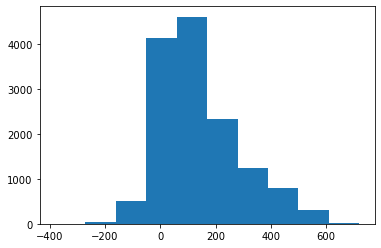

In [136]:
plt.hist(X)

In [ ]:
df_comparison = pd.concat(Series)[['Stab2avg','Stab3avg','Stab4avg','Stab2max','Stab3max','Stab4max','StabilityCalibrator', 'Base', 'SKlearn_calibrator_isotonic', 'SKlearn_calibrator_platt', 'HBCalibrator', 'SBCCalibrator']]
df_comparison.style.apply(color_max, axis=1)

In [25]:
from sklearn.decomposition import PCA
def apply_reduction(trainX,train_y,reduced_type,red_param,train=True,train_X=None):
    
    pixels=int(sqrt(trainX.shape[1]))
    if reduced_type == 'Avgpool':
        polling = torch.nn.AvgPool2d(red_param)
        trainX=polling(torch.tensor(trainX.reshape((len(trainX),pixels,pixels)))).reshape(len(trainX),-1)
        
    elif reduced_type == 'Maxpool':
        polling = torch.nn.MaxPool2d(red_param) 
        trainX=polling(torch.tensor(trainX.reshape((len(trainX),pixels,pixels)))).reshape(len(trainX),-1)
        
    elif reduced_type == 'resize':
        size=pixels//red_param
        length= len(trainX)
        X_train=torch.tensor(trainX.reshape(length,pixels,pixels))
        X_train = X_train[ ..., tf.newaxis]
        trainX=tf.image.resize(X_train, [size,size]).numpy().reshape(length,-1)
                
    elif reduced_type == 'PCA':
        if train == True:
            size=pixels//red_param
            pca = PCA(n_components=size**2)  
            trainX=pca.fit_transform(trainX)
        if train == False:
            size=pixels//red_param
            pca = PCA(n_components=size**2)  
            pca.fit_transform(train_X)
            trainX=pca.transform(trainX.reshape(1,-1))
    elif reduced_type == 'randpix':
        size=(pixels//red_param)**2
        string=np.random.randint(0,255, size=size)        
        trainX=trainX[:,string]
        
    elif reduced_type == 'randset':
        if train == True:
            size=(length//red_param)
            string=np.random.randint(0,length, size=size)
            trainX=trainX[string,:]
            train_y=train_y[string]
        
    #elif reduced_type == 'kmeans':
      
        
    else:
        print("error reduce type")
        
    return trainX,train_y


In [28]:

def stability_calc_reduced(trainX,testX,train_y,test_y_pred,num_labels,reduced_type='Avgpool',red_param=1,RGB=False):
    '''
    Calculates the stability of the test set.
            Parameters:
                    trainX (List)
                    testX (List) 
                    train_y (List)
                    test_y_pred (list)
                    num_labels (Int)
            Returns:
                    stability(List)
    '''  
    
        
    # if RGB==False:
    train_X=trainX
    trainX,train_y = apply_reduction(trainX,train_y,reduced_type,red_param)

    same_nbrs=[]
    other_nbrs=[]
    for i in range(num_labels):
        idx_other=np.where(train_y!=i)
        other_nbrs.append(NearestNeighbors(n_neighbors=1).fit(trainX[idx_other]))
        idx_same=np.where(train_y==i)
        same_nbrs.append(NearestNeighbors(n_neighbors=1).fit(trainX[idx_same]))

    stability=np.array([-1.]*testX.shape[0])
    start = time.time()
    for i in range(testX.shape[0]):
        x=testX[i]
        y=test_y_pred[i]
        x,y = apply_reduction(x.reshape(1, -1),y,reduced_type,red_param,train=False,train_X= train_X)
        pred_label=y

        dist1,idx1= same_nbrs[pred_label].kneighbors(x)
        dist2,idx2= other_nbrs[pred_label].kneighbors(x)

        stability[i]=(dist2-dist1)/2
    end = time.time()
    time_all=end-start
    ex_in_time=testX.shape[0]/time_all
    return stability,time_all,ex_in_time  

In [29]:
  

#avg
all_time=[]
Time_dict={}
for reduced_method in ['PCA','randpix','randset','resize','Avgpool','Maxpool']:#,'kmeans']:
    for red_param in [4]:#range(1,5):
        data_dict={}
        for dataset_name in ['SignLanguage','Fashion','MNIST']:#,'CIFAR_RGB','GTSRB_RGB']:       
            for model_name in ['RF','GB','pytorch']:
                shuffle_list=[]
                for shuffle in range(1):
                    model_info= load_model(dataset_name, model_name, shuffle)
                    num_labels=model_info.data.num_labels
                    RGB='RGB' in dataset_name 

                    stability,time_all,ex_in_time= stability_calc_reduced(model_info.data.X_train,model_info.data.X_val,model_info.data.y_train,model_info.y_pred_val,num_labels,reduced_type=reduced_method,red_param=red_param,RGB=RGB) 
                    #stability_test,_,_= stability_calc_reduced(model_info.data.X_train,model_info.data.X_test,model_info.data.y_train,model_info.y_pred_test,num_labels,pool_type='Avg',pool_size=pool_size,RGB=RGB) 

                    all_time.append((dataset_name,model_name,shuffle,time_all,ex_in_time))
                    shuffle_list.append(ex_in_time)
                data_dict[f'{dataset_name}-{model_name}']= mean_confidence_interval2(shuffle_list)
        Time_dict[f'{reduced_method}-{red_param}']=data_dict
        
pd.DataFrame(Time_dict).to_csv("X_time_df.csv")


print(all_time)
print(Time_dict)





28 7 49
[[173. 177. 181. ...  82. 109.  93.]
 [106. 111. 120. ...   0.   0.   7.]
 [151. 151. 153. ...  47.  40.  37.]
 ...
 [157. 156. 157. ...  81.  83.  84.]
 [192. 192. 192. ... 224. 222. 221.]
 [196. 198. 198. ... 170. 170. 171.]] (20775, 784)
[[ 92. 109. 121. 130. 135. 137. 143. 150. 155. 160. 164. 166. 168. 170.
  171. 171. 175. 160. 172. 171. 171. 170. 170. 169. 169. 168. 166. 164.
   95. 110. 123. 133. 137. 139. 145. 152. 157. 161. 165. 169. 171. 172.
  171. 184. 193. 124. 160. 176. 173. 173. 172. 171. 170. 169. 167. 165.
   96. 112. 124. 134. 139. 141. 147. 153. 159. 162. 167. 171. 172. 174.
  171. 193. 199. 123. 144. 181. 174. 175. 175. 173. 171. 170. 169. 167.
   98. 113. 126. 135. 139. 143. 148. 155. 161. 164. 167. 170. 171. 174.
  172. 192. 209. 131. 140. 183. 173. 175. 174. 173. 171. 169. 169. 167.
   99. 113. 128. 138. 142. 144. 151. 158. 161. 166. 168. 170. 174. 177.
  172. 199. 218. 139. 139. 184. 176. 176. 175. 175. 172. 171. 169. 168.
  101. 116. 130. 139. 144. 147.

KeyboardInterrupt: 

In [15]:
x=[[1,2,3],[2.3,4,5],[3,5,2]]
xx=np.array([1,2,3])
pca=PCA(n_components=2)
pca.fit(x)
pca.transform(xx.reshape(1, -1))

array([[-1.77161445, -0.97993425]])

In [16]:
xx.reshape(1, -1)

array([[1, 2, 3]])